# ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

Скачать данные

Описание столбцов:

1. work_year	Год, в котором была выплачена зарплата.
2. experience_level	Опыт работы на этой должности в течение года со следующими возможными значениями:
-  EN — Entry-level/Junior;
-  MI — Mid-level/Intermediate;
-  SE — Senior-level/Expert;
-  EX — Executive-level/Director.
3. employment_type	Тип трудоустройства для этой роли:
- PT — неполный рабочий день;
- FT — полный рабочий день;
- CT — контракт;
- FL — фриланс.
4. job_title	Роль, в которой соискатель работал в течение года.
5. salary	Общая выплаченная валовая сумма заработной платы.
6. salary_currency	Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
7. salary_in_usd	Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
8. employee_residence	Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
9. remote_ratio	Общий объём работы, выполняемой удалённо. Возможные значения:
- 0 — удалённой работы нет (менее 20 %);
- 50 — частично удалённая работа;
- 100 — полностью удалённая работа (более 80 %).
10. company_location	Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
11. company_size	Среднее количество людей, работавших в компании в течение года:
- S — менее 50 сотрудников (небольшая компания);
- M — от 50 до 250 сотрудников (средняя компания);
- L — более 250 сотрудников (крупная компания).

### Постановка задачи
Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

В процессе своего анализа вы должны:

- Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
- А также ответить на ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
- Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

- тесты для количественного признака:
- для одной выборки;
- для двух выборок;
- для нескольких выборок;
- тест для категориальных признаков.

Результатом вашей работы должен стать ноутбук (IPYNB-файл) с кодом для исследования, а также с выводами и рассуждениями, полученными на основе разведывательного анализа.

In [159]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import plotly.express as px

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

import plotly.graph_objects as go


# 1.Загрузка и обработка данных

In [106]:
# загрузка данных
# Загрузка данных
df = pd.read_csv('data/ds_salaries.csv')

# Фильтрация Data Scientist
data = df.copy()

# Проверка данных
data.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [107]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


### Проверка на пропуски и дупликаты

In [108]:
# Проверка на пропуски
missing_values = data.isnull().sum()
print("Пропуски в данных:\n", missing_values)

# Проверка на дубликаты
duplicates = data.duplicated().sum()
print(f'Количество дубликатов: {duplicates}')

# Если необходимо удалить дубликаты:
# data = data.drop_duplicates()


Пропуски в данных:
 Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Количество дубликатов: 0


### Неинформативные данные
"Unnamed: 0" - копирует индексы строк, "salary" - выражает зарплату в местной валюте, "salary_currency" - не нужен если привести данные о з/п к одной единице измерения, что уже сделано в "salary_in_usd".
Удалим неинформативные данные.

In [109]:
# Определение неинформативных признаков
uninformative_columns = ['Unnamed: 0', 'salary', 'salary_currency']  # Добавьте сюда признаки, которые нужно исключить

# Удаление неинформативных признаков
data = data.drop(columns=uninformative_columns, errors='ignore')
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


###  Классифицируем данные

In [110]:
# Числовые признаки
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Числовые признаки:", numeric_columns)

# Категориальные признаки
categorical_columns = data.select_dtypes(include=['object']).columns
print("Категориальные признаки:", categorical_columns)


Числовые признаки: Index(['work_year', 'salary_in_usd', 'remote_ratio'], dtype='object')
Категориальные признаки: Index(['experience_level', 'employment_type', 'job_title',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


Категориальные данные 'experience_level', 'company_size' являются порядковыми, поэтому их можно преобразовать в числловые.

In [111]:
# Преобразование 'experience_level' в числовые значения
experience_mapping = {
    'EN': 1,
    'MI': 2,
    'SE': 3,
    'EX': 4
}
data['experience_level'] = data['experience_level'].map(experience_mapping)

# Преобразование 'company_size' в числовые значения
company_size_mapping = {
    'S': 1,
    'M': 2,
    'L': 3
}
data['company_size'] = data['company_size'].map(company_size_mapping)

# Проверка результатов преобразования
data.head()


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,FT,Data Scientist,79833,DE,0,DE,3
1,2020,3,FT,Machine Learning Scientist,260000,JP,0,JP,1
2,2020,3,FT,Big Data Engineer,109024,GB,50,GB,2
3,2020,2,FT,Product Data Analyst,20000,HN,0,HN,1
4,2020,3,FT,Machine Learning Engineer,150000,US,50,US,3


Таким образом
- числовые признаки: 'work_year',	'experience_level', 'salary_in_usd', 'remote_ratio', 'company_size'.
- Категориальные признаки: 'employment_type', 'job_title', 'employee_residence', 'company_location'.

### Основные статистические характиристики

In [112]:
# Основные статистические характеристики для каждого числовых признаков
data.describe()



,work_year,experience_level,salary_in_usd,remote_ratio,company_size
count,607.000000,607.000000,607.000000,607.00000,607.000000
mean,2021.405272,2.401977,112297.869852,70.92257,2.189456
std,0.692133,0.785510,70957.259411,40.70913,0.654021
min,2020.000000,1.000000,2859.000000,0.00000,1.000000
25%,2021.000000,2.000000,62726.000000,50.00000,2.000000
50%,2022.000000,3.000000,101570.000000,100.00000,2.000000
75%,2022.000000,3.000000,150000.000000,100.00000,3.000000
max,2022.000000,4.000000,600000.000000,100.00000,3.000000


Построим boxplot зароботной тлаты и посмотрим на выбросы



In [113]:

# Создание горизонтального интерактивного boxplot для зарплат
fig = px.box(data, x='salary_in_usd', title='распределение зарплаты', orientation='h')
fig.update_layout(xaxis_title='Зарплата (USD)')
fig.show()


З/П выше 276000 долларов является выбросами. Данные нужно очистить.

In [114]:
# Очистка данных: удаление строк с зарплатой выше 276000 долларов
data = data[data['salary_in_usd'] <= 276000]

# Проверка количества оставшихся строк
remaining_rows = data.shape[0]
print(f"Количество оставшихся строк после очистки: {remaining_rows}")


Количество оставшихся строк после очистки: 597


In [115]:
# Основные статистические характеристики для категориальных признаков
data.describe(include='object')


,employment_type,job_title,employee_residence,company_location
count,597,597,597,597
unique,4,49,57,50
top,FT,Data Scientist,US,US
freq,579,142,322,345


# 2.Разведывательный анализ данных 

### 2.1. Визуальный анализ данных 

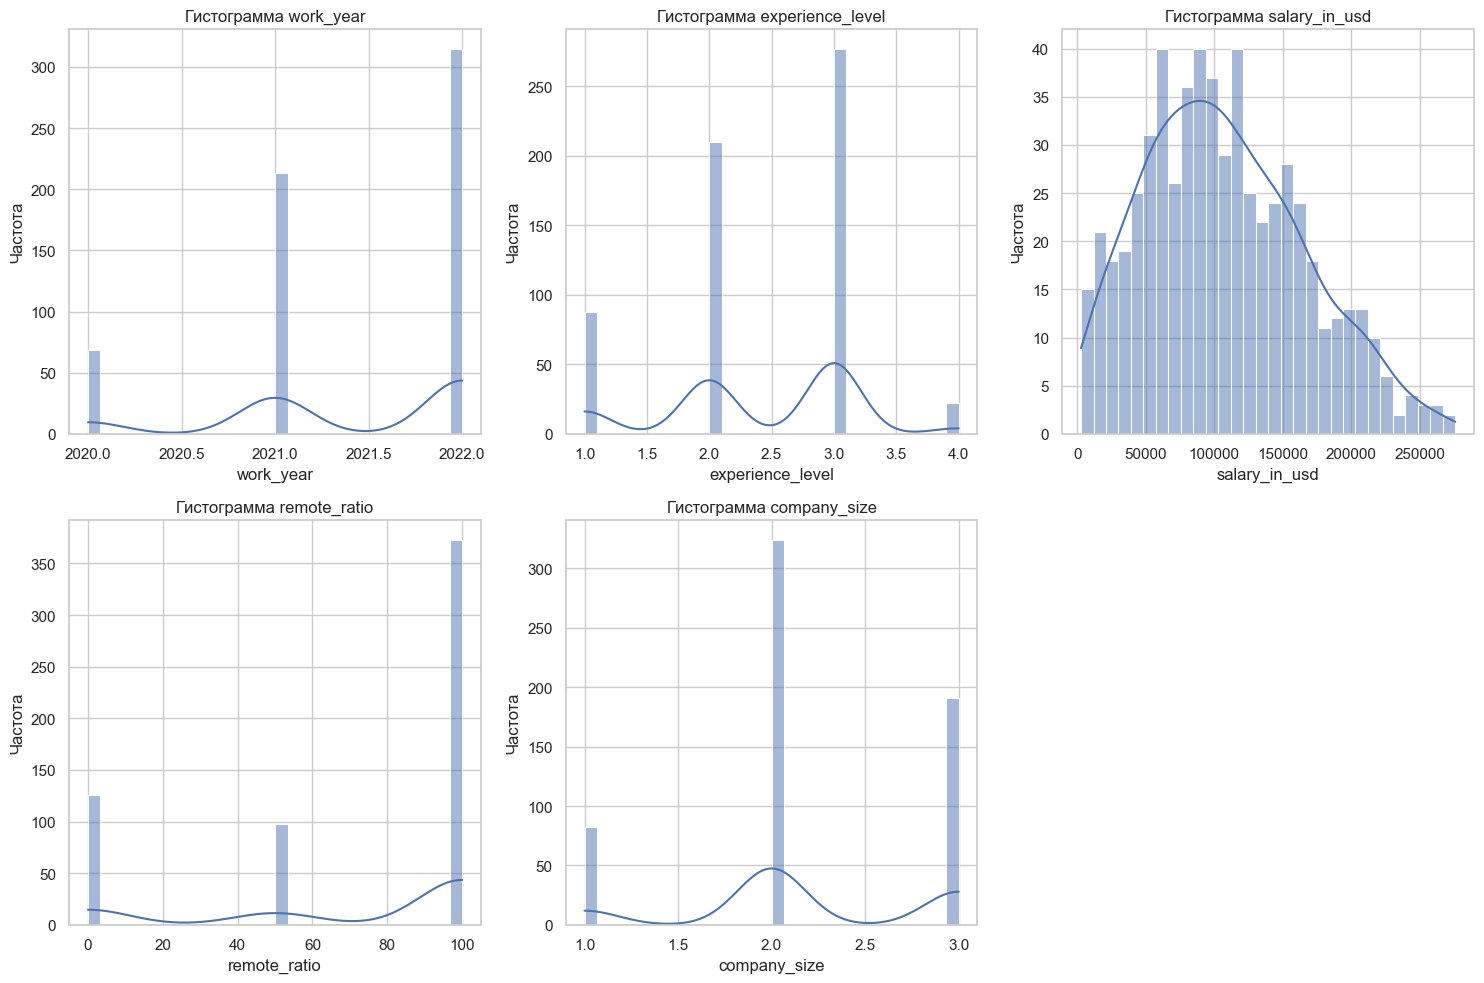

In [116]:
# Настройка стиля Seaborn
sns.set(style="whitegrid")

# Определение числовых признаков
numeric_columns = ['work_year', 'experience_level', 'salary_in_usd', 'remote_ratio', 'company_size']

# Построение гистограмм для числовых признаков
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Гистограмма {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()


### В порядке графиков:
1. Наибольшее количество наблюдений собрано за 2021 и 2022 года
2. Распределение опыта в наблюдениях Senior-level/Expert (~280), Mid-level (~210), Entry-level (~80) и меньше всего у Executive-level (~25)
3. Гистограмма распределения заработной платы похожа на обрезанное нормальное распределение в котором отсутствует 1-й квантиль. Зарплата не может начинаться с нуля.
4. ~380 позиций позволяют полностью работать удаленно, ~100 - частично работать удаленно, ~125 работа в офисе.
5. ~330 компаний имеют средний размер, чуть менее 200 компаний являются крупными и ~80 имеют мальенький размер.

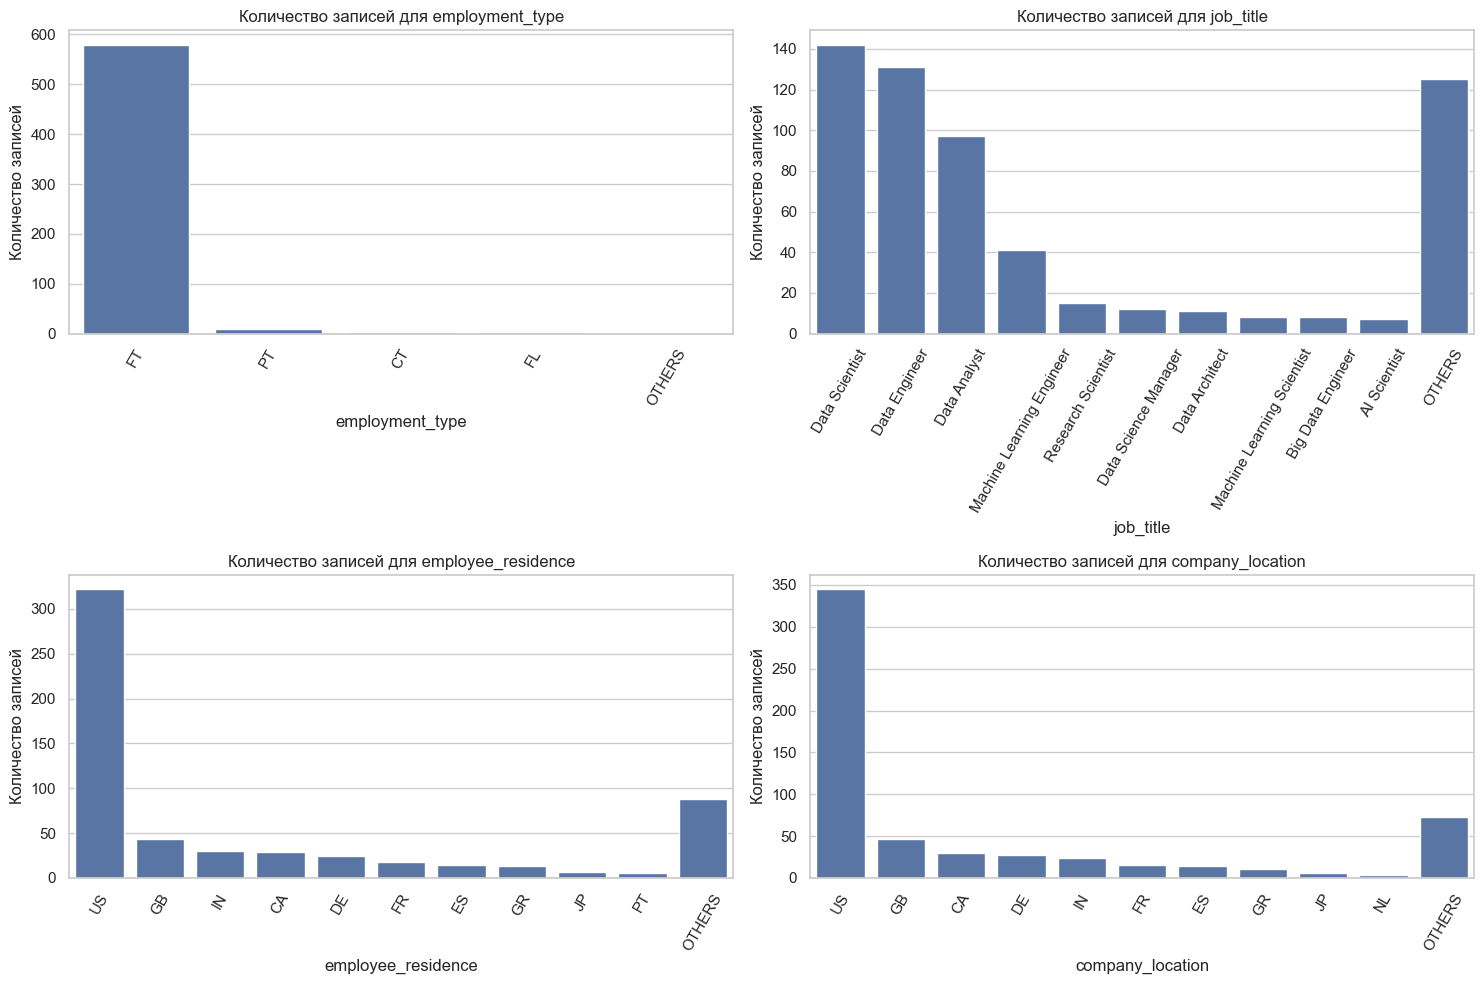

In [117]:
# Определение категориальных признаков
categorical_columns = ['employment_type', 'job_title', 'employee_residence', 'company_location']

# Обработка 'job_title'
# Подсчет количества записей для каждой профессии в 'job_title'
job_counts = data['job_title'].value_counts()
top_jobs = job_counts.nlargest(10).index
data['job_title'] = data['job_title'].where(data['job_title'].isin(top_jobs), 'OTHERS')

# Обработка 'employee_residence'
# Подсчет количества записей для каждой страны проживания
residence_counts = data['employee_residence'].value_counts()
top_residences = residence_counts.nlargest(10).index
data['employee_residence'] = data['employee_residence'].where(data['employee_residence'].isin(top_residences), 'OTHERS')

# Обработка 'company_location'
# Подсчет количества записей для каждой страны компании
company_counts = data['company_location'].value_counts()
top_companies = company_counts.nlargest(10).index
data['company_location'] = data['company_location'].where(data['company_location'].isin(top_companies), 'OTHERS')

# Построение графиков для категориальных признаков
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_columns):
    plt.subplot(2, 2, i + 1)
    # Получение порядка значений с 'OTHERS' в конце
    order = data[col].value_counts().index.tolist()
    if 'OTHERS' in order:
        order.remove('OTHERS')
    order.append('OTHERS')
    
    sns.countplot(data=data, x=col, order=order)
    plt.title(f'Количество записей для {col}')
    plt.xlabel(col)
    plt.ylabel('Количество записей')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()




### В порядке графиков:
1. Подавляющую часть данных занимают позиции FT - полная занятость. Остальные варианты занятости имеют размер погрешности. Следует задуматься над тем, чтобы оставить для модели только FT.
2. Более 140 позиций у Data Scientist, ~130 - Data Engineer, Data Analyst - ~95, 40 - Machine Learning Engineer, далее количество представителей професий идет по ниспадающей.
3. и 4. Больше всего сотрудников находится US, как и подавляющее количество компаний находится там же. Следует проверить эти данные на корреляцию и при необходимости удалить один из признаков, дабы не вредить модели.

In [118]:
# Проверим на сколько сильно коррелируют признаки
# Построение таблицы сопряженности
contingency_table = pd.crosstab(data['company_location'], data['employee_residence'])

# Вычисление хи-квадрат статистики
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Вычисление Cramér's V
n = contingency_table.sum().sum()  # Общее количество записей
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.8499


Наблюдается сильная корреляция. Один из признаков следует удалить. Удалять будем 'employee_residence', так как расположение компании, как платильщика зарплаты для нас более информативно.

In [119]:
# Удаление признака employee_residence
data = data.drop(columns=['employee_residence'])

In [120]:


# Обновленный список категориальных признаков
categorical_columns = ['employment_type', 'job_title', 'company_location']

# Проход по каждому категориальному признаку
for col in categorical_columns:
    
    # Подсчет количества записей для текущего признака
    counts = data[col].value_counts()
    top_values = counts.nlargest(10).index  # Топ-10 значений

    # Замена остальных значений на 'OTHERS'
    data[col] = data[col].where(data[col].isin(top_values), 'OTHERS')
    
    # Построение интерактивного боксплота
    fig = px.box(data, x=col, y='salary_in_usd', category_orders={col: data[col].value_counts().index},
                 title=f'Влияние {col} на зарплату', labels={col: col, 'salary_in_usd': 'Зарплата (USD)'})
    
    fig.update_layout(xaxis_title=col, yaxis_title='Зарплата (USD)', xaxis={'categoryorder': 'total ascending'})
    fig.show()



1. employment_type(вид занятости): лучшие показатели по зароботной плате показывает вид занятости FT - полная занятость. Следует не забывать что более 95% выборки в этой категории и представители остальных категорий имеют маленькую репрезентативность.
2. job_title(роль соискателя): показатели з/п показывают сильную зависимость от роли соискателя в компании. У data scientist, data engineer, data analist, machine learning engineer размер медианной зарпалаты находится в ройное 100000, в то время как у data science manager, data architect, machine learning scientist мудианная з/п более 150000.
3. company_location(страна компании): лучшие показатели по з/п у компаний из US(США) - медиана 135000. У компаний из других стран медианная зарплата менее 100000.

In [121]:
# Построение boxplot для распределения зарплаты по размеру компании
fig = px.box(data, x='company_size', y='salary_in_usd', 
             title='Распределение зарплат для компаний разного размера', 
             labels={'company_size': 'Размер компании', 'salary_in_usd': 'Зарплата (USD)'})

# Настройки осей
fig.update_layout(xaxis_title='Размер компании', yaxis_title='Зарплата (USD)')

# Отображение графика
fig.show()

company_size(размер компании): у маленьких компаний медианная зарплата составляет 65000. В средних компаниях - почти 113000, в крупных - 96000.

In [122]:
# Построение boxplot для распределения зарплаты в зависимости от удаленной работы (remote_ratio)
fig = px.box(data, x='remote_ratio', y='salary_in_usd', 
             title='Распределение зарплат в зависимости от удаленной работы', 
             labels={'remote_ratio': 'Удаленная работа (%)', 'salary_in_usd': 'Зарплата (USD)'})

# Настройки осей
fig.update_layout(xaxis_title='Удаленная работа (%)', yaxis_title='Зарплата (USD)')

# Отображение графика
fig.show()

remote_ratio(показатель удаленной работы): з/п у позиций где работа выполняется частично удаленно, а частично в офисе ниже чем на позициях с полностью удаленной работой или вовсе без таковой.

In [123]:
# Построение boxplot для распределения зарплаты в зависимости от уровня опыта (experience_level)
fig = px.box(data, x='experience_level', y='salary_in_usd', 
             title='Распределение зарплат в зависимости от уровня опыта', 
             labels={'experience_level': 'Уровень опыта', 'salary_in_usd': 'Зарплата (USD)'})

# Настройки осей
fig.update_layout(xaxis_title='Уровень опыта', yaxis_title='Зарплата (USD)')

# Отображение графика
fig.show()

experience_level(уровень опыта): показатель зарпалаты ростет с показателем уровня опыта.

In [124]:
# Построение boxplot для распределения зарплаты в зависимости от года работы (work_year)
fig = px.box(data, x='work_year', y='salary_in_usd', 
             title='Распределение зарплат в зависимости от года работы', 
             labels={'work_year': 'Год работы', 'salary_in_usd': 'Зарплата (USD)'})

# Настройки осей
fig.update_layout(xaxis_title='Год работы', yaxis_title='Зарплата (USD)')

# Отображение графика
fig.show()

В выборке наблюдается рост зарпалты с каждым годом собираемых данных.

### 2.2. Статистический анализ данных

#### 1.Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
Формулировка гипотез:
- Нулевая гипотеза (H₀): Средние зарплаты специалистов Data Scientist не изменяются ежегодно (различия между годами незначимы).
- Альтернативная гипотеза (H₁): Средние зарплаты специалистов Data Scientist изменяются ежегодно (различия между годами значимы).

Методология:

- Для проверки гипотезы можно использовать дисперсионный анализ (ANOVA), так как сравниваем средние значения зарплат за несколько лет.
- Если данные не соответствуют нормальному распределению, можно применить непараметрический тест Краскела-Уоллиса.

In [125]:
# Проверка данных на нормальность
from scipy.stats import shapiro

# Тест Шапиро-Уилка
stat, p_value = shapiro(data['salary_in_usd'])

# Вывод результата
print(f"Статистика теста Шапиро-Уилка: {stat:.4f}, p-значение: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Данные не распределены нормально. Используй Краскера-Уоллиса")
else:
    print("Данные распределены нормально.")


Статистика теста Шапиро-Уилка: 0.9784, p-значение: 0.0000
Данные не распределены нормально. Используй Краскера-Уоллиса


In [126]:
# Получаем зарплаты по уровням опыта
groups = [group['salary_in_usd'].values for name, group in data.groupby('work_year')]

# Применение критерия Краскела-Уоллиса
stat, p_value = kruskal(*groups)

print(f"Статистика теста Краскела-Уоллиса: {stat:.4f}, p-значение: {p_value:.4f}")

# Проверка p-значения
if p_value < 0.05:
    print("Существует статистически значимая разница в зарплатах по годам.")
else:
    print("Нет статистически значимой разницы в зарплатах по годам.")

Статистика теста Краскела-Уоллиса: 54.5998, p-значение: 0.0000
Существует статистически значимая разница в зарплатах по годам.


Построим график зарплат для data_science по годам


In [127]:
# Фильтрация данных для Data Scientist
data_science_data = data[data['job_title'] == 'Data Scientist']

# Создание интерактивного боксового графика распределения зарплат по годам
fig = px.box(data_science_data, x='work_year', y='salary_in_usd', 
              title='Распределение зарплат Data Scientist по годам',
              labels={'salary_in_usd': 'Зарплата (USD)', 'work_year': 'Год'},
              points='all')  # Показывать все точки

# Обновление оформления графика
fig.update_layout(xaxis_title='Год',
                  yaxis_title='Зарплата (USD)')

# Вывод графика
fig.show()

#### Вывод: 
Cтатистический тест и графики подтверждают альтернативную теорию об изменении зароботной платы специалистов дата сайнс. Наблюдается ежегодный рост зарпалты у специалистов Data Scientist.

#### 2.Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

Нулевая гипотеза (H0):
Средние зарплаты специалистов Data Scientist и Data Engineer в 2022 году равны.

Альтернативная гипотеза (H1):
Средние зарплаты специалистов Data Scientist и Data Engineer в 2022 году не равны.

Проверим данные на нормальность.

In [128]:

# Фильтрация данных для 2022 года
data_2022 = data[data['work_year'] == 2022]

# Извлечение зарплат для Data Scientist и Data Engineer
ds_salaries = data_2022[data_2022['job_title'] == 'Data Scientist']['salary_in_usd']
de_salaries = data_2022[data_2022['job_title'] == 'Data Engineer']['salary_in_usd']

# Уровень значимости
alpha = 0.05

# Проверка нормальности для Data Scientist
stat_ds, p_ds = stats.shapiro(ds_salaries)
print('Data Scientist:')
print('p-value = %.3f' % (p_ds))

# Интерпретация результата для Data Scientist
if p_ds <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

# Проверка нормальности для Data Engineer
stat_de, p_de = stats.shapiro(de_salaries)
print('\nData Engineer:')
print('p-value = %.3f' % (p_de))

# Интерпретация результата для Data Engineer
if p_de <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')


Data Scientist:
p-value = 0.327
Распределение нормальное

Data Engineer:
p-value = 0.035
Распределение не нормальное


Одна из выборок не имеет нормальное распределение. Необходимо использовть непараметрические тесты.
Выбор теста: Тест Манна-Уитни (U-тест) не требует нормальности и позволяет сравнивать медианные значения между группами.

In [129]:
# Фильтрация данных для 2022 года
data_2022 = data[data['work_year'] == 2022]

# Извлечение зарплат для Data Scientist и Data Engineer
ds_salaries = data_2022[data_2022['job_title'] == 'Data Scientist']['salary_in_usd']
de_salaries = data_2022[data_2022['job_title'] == 'Data Engineer']['salary_in_usd']

# Выполнение теста Манна-Уитни
stat, p = stats.mannwhitneyu(ds_salaries, de_salaries, alternative='two-sided')

# Вывод результатов
print('Статистика теста: %.3f' % stat)
print('p-value: %.3f' % p)

# Интерпретация результата
alpha = 0.05
if p <= alpha:
    print('Отвергаем нулевую гипотезу: средние зарплаты Data Scientist и Data Engineer различаются.')
else:
    print('Не отвергаем нулевую гипотезу: нет достаточных оснований утверждать, что средние зарплаты Data Scientist и Data Engineer различаются.')


Статистика теста: 3866.500
p-value: 0.118
Не отвергаем нулевую гипотезу: нет достаточных оснований утверждать, что средние зарплаты Data Scientist и Data Engineer различаются.


Продемонстрируем на графике.

In [130]:
# Фильтрация данных для 2022 года
data_2022 = data[data['work_year'] == 2022]

# Создание нового DataFrame для визуализации
salary_data = data_2022[data_2022['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Построение интерактивного боксплота
fig = px.box(salary_data, x='job_title', y='salary_in_usd',
              title='Сравнение зарплат Data Scientist и Data Engineer в 2022 году',
              labels={'job_title': 'Должность', 'salary_in_usd': 'Зарплата (USD)'},
              color='job_title')

# Обновление оформления графика
fig.update_traces(boxmean=True)  # Показываем среднее значение
fig.update_layout(xaxis_title='Должность',
                  yaxis_title='Зарплата (USD)',
                  boxmode='group')  # Группировка боксплотов

# Вывод графика
fig.show()

#### Вывод:
Графики показывают различия в средних зарпалатах у data engineer и data scientist: 124000 и 136000 соответственно. Однако статистический тест Манна-Уитни говорит, что нет достаточных оснований считать, что зарплаты представителей этих групп отличаются. Зарпалты представителей этих профессий относятся к одному порядку. Статистически значимых различий нет.

### 3.Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

- Нулевая гипотеза (H0):
Средние зарплаты специалистов Data Scientist не отличаются между компаниями различных размеров.
Это означает, что нет статистически значимых различий в средних зарплатах Data Scientist в небольших (S), средних (M) и крупных (L) компаниях.

- Альтернативная гипотеза (H1):
Средние зарплаты специалистов Data Scientist отличаются между компаниями различных размеров.
Это означает, что существует хотя бы одна пара компаний, где средние зарплаты специалистов Data Scientist статистически значимо различаются.

In [131]:
# Разделение данных по размеру компании
small_companies = data[data['company_size'] == 1]['salary_in_usd']
medium_companies = data[data['company_size'] == 2]['salary_in_usd']
large_companies = data[data['company_size'] == 3]['salary_in_usd']

# Проверка нормальности с помощью теста Шапиро-Уилка
alpha = 0.05

for group, salaries in zip(['Small', 'Medium', 'Large'], 
                            [small_companies, medium_companies, large_companies]):
    stat, p = stats.shapiro(salaries)
    print(f'{group} Companies: p-value = {p:.3f}')
    
    if p <= alpha:
        print(f'{group} Companies: Распределение не нормальное\n')
    else:
        print(f'{group} Companies: Распределение нормальное\n')

Small Companies: p-value = 0.000
Small Companies: Распределение не нормальное

Medium Companies: p-value = 0.029
Medium Companies: Распределение не нормальное

Large Companies: p-value = 0.000
Large Companies: Распределение не нормальное



Данные распределены не нормально, выполняем тест Краскела-Уоллиса.

In [132]:
stat, p = stats.kruskal(small_companies, medium_companies, large_companies)
print(f'Критерий Краскела-Уоллиса: p-value = {p:.3f}')
    
if p <= alpha:
    print('Существует статистически значимое различие в зарплатах между группами. Отвергаем нулевую теорию\n')
else:
    print('Нет статистически значимого различия в зарплатах между группами.\n')

Критерий Краскела-Уоллиса: p-value = 0.000
Существует статистически значимое различие в зарплатах между группами. Отвергаем нулевую теорию



Построим график

In [133]:


# Создание интерактивного графика
fig = px.box(data, x='company_size', y='salary_in_usd',
              title='Распределение зарплат Data Scientist по размерам компаний',
              labels={'company_size': 'Размер компании', 'salary_in_usd': 'Зарплата (USD)'},
              points='all')  # отображение всех точек для большей наглядности

fig.update_traces(boxmean=True)  # Показываем среднее значение
# Отображение графика
fig.show()


#### Вывод: 
Статистические тесты указываюит на значимые различия размера з/п хотя бы в одной из пар сравниваемых групп.
График подтверждает это и показвает существенные отличия первой группы (маленькие компании) от средних и больших компаний. Выгоднее работать в средней или большой компании.


### 4. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
- Нулевая гипотеза (H0): Нет статистически значимой связи между наличием должностей Data Scientist и Data Engineer и размером компании.
- Альтернативная гипотеза (H1): Существует статистически значимая связь между наличием должностей Data Scientist и Data Engineer и размером компании.

In [134]:
# Фильтруем данные для должностей Data Scientist и Data Engineer
data_filtered = data[data['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Проверка нормальности для каждой группы
grouped_data = data_filtered.groupby('company_size')['salary_in_usd'].apply(list)

# Уровень значимости
alpha = 0.05

for size, salaries in grouped_data.items():
    stat, p = stats.shapiro(salaries)
    print(f'{size} - p-value = {p:.3f}')
    if p <= alpha:
        print(f'Распределение для {size} не нормальное\n')
    else:
        print(f'Распределение для {size} нормальное\n')

1 - p-value = 0.517
Распределение для 1 нормальное

2 - p-value = 0.289
Распределение для 2 нормальное

3 - p-value = 0.004
Распределение для 3 не нормальное



Распределение в группе больших компаний не нормальное. Используем Хи-квадрат и критерий Краскела-Уоллиса.

In [137]:

# Создание сводной таблицы для должностей и размеров компании
contingency_table = pd.crosstab(data['job_title'], data['company_size'])

# Выполнение теста хи-квадрат
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Результаты
print(f'Chi-squared statistic: {chi2}')
print(f'p-value: {p}')

# Интерпретация результата
alpha = 0.05
if p <= alpha:
    print("Отклоняем нулевую гипотезу: есть статистически значимая связь.")
else:
    print("Не отклоняем нулевую гипотезу: нет статистически значимой связи.")

Chi-squared statistic: 87.61091225005725
p-value: 3.8661652158163734e-11
Отклоняем нулевую гипотезу: есть статистически значимая связь.


In [135]:
# Критерий Краскела-Уоллиса
stat, p = stats.kruskal(*grouped_data)

print(f'Критерий Краскела-Уоллиса: статистика = {stat:.3f}, p-value = {p:.3f}')

if p <= alpha:
    print('Существует статистически значимая связь между должностями и размером компании.')
else:
    print('Нет статистически значимой связи между должностями и размером компании.')


Критерий Краскела-Уоллиса: статистика = 36.255, p-value = 0.000
Существует статистически значимая связь между должностями и размером компании.


Построим график

In [136]:

# Считаем количество должностей в зависимости от размера компании
count_data = data_filtered.groupby(['company_size', 'job_title']).size().reset_index(name='count')

# Рассчитываем проценты для каждой группы
count_data['percentage'] = count_data.groupby('company_size')['count'].transform(lambda x: x / x.sum() * 100)

# Создаем интерактивный график
fig = px.bar(count_data, 
             x='company_size', 
             y='percentage', 
             color='job_title', 
             barmode='group',
             title='Процентное соотношение Data Scientist и Data Engineer по размерам компаний',
             labels={'percentage': 'Процент (%)', 'company_size': 'Размер компании'},
             text='percentage')

# Настройки отображения значений на столбцах
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')


# Установка размеров графика
fig.update_layout(width=1100, height=600)

# Показываем график
fig.show()

#### Вывод:
Существет взаимосвязь между наличием должностей Data Scientist и Data Engineer и размером компании.
В маленьких компаниях количество Data Scientist почти в 4 раза больше чем Data Engineer. С увелечение размера компании количество выравнивается и колеблется незначительно.

### 5.(дополнительная бизнес-гипотеза) Существует ли взаимосвязь между опытом работы и размером компании для должностией Data Scientist и Data Engineer?

- Нулевая гипотеза (H0)
Нет статистически значимой взаимосвязи между опытом работы и размером компании для должностей Data Scientist и Data Engineer. То есть, опыт работы не влияет на выбор размера компании, в которой работают специалисты на этих должностях.

- Альтернативная гипотеза (H1)
Существует статистически значимая взаимосвязь между опытом работы и размером компании для должностей Data Scientist и Data Engineer. То есть, опыт работы влияет на выбор размера компании, в которой работают специалисты на этих должностях.

проверим данные на нормальность


In [139]:
# Фильтруем данные для Data Scientist и Data Engineer
data_scientist = data[data['job_title'] == 'Data Scientist']
data_engineer = data[data['job_title'] == 'Data Engineer']

# Проверяем нормальность для каждой группы по размеру компании
for company_size in data['company_size'].unique():
    ds_group = data_scientist[data_scientist['company_size'] == company_size]['experience_level']
    de_group = data_engineer[data_engineer['company_size'] == company_size]['experience_level']
    
    # Проводим тест Шапиро — Уилка для каждой группы
    _, p_ds = stats.shapiro(ds_group)
    _, p_de = stats.shapiro(de_group)

    print(f'Размер компании: {company_size}')
    print(f'p-value для Data Scientist: {p_ds:.3f} - {"Не нормальное" if p_ds < 0.05 else "Нормальное"}')
    print(f'p-value для Data Engineer: {p_de:.3f} - {"Не нормальное" if p_de < 0.05 else "Нормальное"}')
    print('---')

Размер компании: 3
p-value для Data Scientist: 0.000 - Не нормальное
p-value для Data Engineer: 0.000 - Не нормальное
---
Размер компании: 1
p-value для Data Scientist: 0.000 - Не нормальное
p-value для Data Engineer: 0.035 - Не нормальное
---
Размер компании: 2
p-value для Data Scientist: 0.000 - Не нормальное
p-value для Data Engineer: 0.000 - Не нормальное
---


Проведем тест Краскела-Уоллиса

In [140]:
# Фильтруем данные для Data Scientist и Data Engineer
data_filtered = data[data['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Группируем данные по размеру компании
grouped_data = [group['experience_level'] for name, group in data_filtered.groupby('company_size')]

# Применяем критерий Краскела-Уоллиса
statistic, p_value = stats.kruskal(*grouped_data)

# Выводим результаты
print(f'Statistic: {statistic:.3f}, p-value: {p_value:.3f}')

# Интерпретируем результат
alpha = 0.05
if p_value <= alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая разница между группами.")
else:
    print("Не отвергаем нулевую гипотезу: нет статистически значимой разницы между группами.")

Statistic: 23.914, p-value: 0.000
Отвергаем нулевую гипотезу: существует статистически значимая разница между группами.


Построим график

In [141]:
# Фильтруем данные для Data Scientist и Data Engineer
data_filtered = data[data['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Создание интерактивного боксплота
fig = px.box(data_filtered, 
              x='company_size', 
              y='experience_level', 
              color='job_title',
              title='Распределение опыта работы для Data Scientist и Data Engineer по размерам компаний',
              labels={'company_size': 'Размер компании', 
                      'experience_level': 'Уровень опыта работы'},
              points='all'  # Отображение всех точек данных
             )

# Настройка осей
fig.update_layout(yaxis_title='Уровень опыта работы',
                  xaxis_title='Размер компании')

# Отображение графика
fig.show()

Графики компаний среднеги и большого размера почти не отличаются. Проверим есть статистические различия в этих группах с помощью теста Манна-Уитни.

In [142]:

# Фильтруем данные для компаний среднего и большого размера
data_filtered = data[data['company_size'].isin([2, 3])]

# Фильтруем данные для Data Scientist и Data Engineer
data_filtered = data_filtered[data_filtered['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Разделяем данные на две группы по должности
group_data_scientist = data_filtered[data_filtered['job_title'] == 'Data Scientist']['experience_level']
group_data_engineer = data_filtered[data_filtered['job_title'] == 'Data Engineer']['experience_level']

# Выполнение теста Манна-Уитни
statistic, p_value = stats.mannwhitneyu(group_data_scientist, group_data_engineer)

# Вывод результатов
print(f'Statistic: {statistic:.3f}, p-value: {p_value:.3f}')

# Интерпретация результата
alpha = 0.05
if p_value <= alpha:
    print('Отвергаем нулевую гипотезу: существует статистически значимая разница между группами.')
else:
    print('Не отвергаем нулевую гипотезу: нет статистически значимой разницы между группами.')


Statistic: 7139.000, p-value: 0.403
Не отвергаем нулевую гипотезу: нет статистически значимой разницы между группами.


#### Вывод: 
Статистически значимые различия есть только для компаний маленького размера. В этих компаниях наблюдается больше работников с начальным и средним уровнем опыта. Можем предположить что в такие компании охотнее принимают людей с меньшим опытом работы.


### 6.(дополнительная бизнес-гипотеза) Существует ли статистическая значимаость в размере з/п для специалистов data science работающих в американских компаниях по сравнению с остальными?

- Нулевая гипотеза (H0): Нет статистически значимой разницы в зарплатах специалистов Data Science, работающих в американских компаниях, по сравнению с зарплатами специалистов, работающих в других странах. (μ_А = μ_О)

- Альтернативная гипотеза (H1): Существует статистически значимая разница в зарплатах специалистов Data Science, работающих в американских компаниях, по сравнению с зарплатами специалистов, работающих в других странах. (μ_А ≠ μ_О)

Проверим группы на нормальность.

In [143]:
# Фильтрация данных для специалистов Data Science
data_science = data[data['job_title'] == 'Data Scientist']

# Группировка по компании
group_american = data_science[data_science['company_location'] == 'US']['salary_in_usd']
group_non_american = data_science[data_science['company_location'] != 'US']['salary_in_usd']

# 1. Проверка на нормальность для обеих групп
alpha = 0.05
_, p1 = stats.shapiro(group_american)
_, p2 = stats.shapiro(group_non_american)

print('p-value для американских компаний:', p1)
print('p-value для неамериканских компаний:', p2)

# Интерпретация результатов проверки нормальности
if p1 > alpha:
    print('Распределение зарплат в американских компаниях нормально')
else:
    print('Распределение зарплат в американских компаниях не нормально')

if p2 > alpha:
    print('Распределение зарплат в неамериканских компаниях нормально')
else:
    print('Распределение зарплат в неамериканских компаниях не нормально')

# 2. Проверка равенства дисперсий
_, p_var = stats.levene(group_american, group_non_american)

print('p-value для проверки равенства дисперсий:', p_var)

# Интерпретация результатов проверки равенства дисперсий
if p_var > alpha:
    print('Дисперсии в группах равны')
else:
    print('Дисперсии в группах не равны')

p-value для американских компаний: 0.45575439329061607
p-value для неамериканских компаний: 0.009822100550252188
Распределение зарплат в американских компаниях нормально
Распределение зарплат в неамериканских компаниях не нормально
p-value для проверки равенства дисперсий: 0.060460502010297595
Дисперсии в группах равны


Таким образом, лучший выбор для тестирования значимости разницы в средних значениях зарплат между двумя группами — это t-тест для независимых выборок с предположением о равенстве дисперсий.

In [144]:
# Выполнение t-теста для независимых выборок
t_statistic, p_value = stats.ttest_ind(group_american, group_non_american, equal_var=True)

print(f't-statistic: {t_statistic}, p-value: {p_value}')

# Интерпретация результатов
if p_value <= alpha:
    print('Отвергаем нулевую гипотезу: существует статистически значимая разница в зарплатах.')
else:
    print('Не удается отвергнуть нулевую гипотезу: статистически значимой разницы в зарплатах нет.')

t-statistic: 11.049125592147014, p-value: 8.487395654597195e-21
Отвергаем нулевую гипотезу: существует статистически значимая разница в зарплатах.


In [148]:
# Фильтруем данные по типу компании
american_companies = data[data['company_location'] == 'US']
non_american_companies = data[data['company_location'] != 'US']

# Создаем DataFrame для визуализации
data_to_plot = pd.DataFrame({
    'Company Type': ['American'] * len(american_companies) + ['Non-American'] * len(non_american_companies),
    'Salary': list(american_companies['salary_in_usd']) + list(non_american_companies['salary_in_usd'])
})

# Построение боксплота
fig = px.box(data_to_plot, x='Company Type', y='Salary', 
             title='Зарплата Data Scientist в Американских и Неамериканских Компаниях',
             labels={'Salary': 'Зарплата (USD)', 'Company Type': 'Тип Компании'})

# Отображение медианы на графике
fig.update_traces(boxmean=True)  # Отображение медианы

fig.show()

#### Вывод:
Зароботная плата специалистов data science работающих на американские компании существенно выше чем у работников в других странах. Это предаоложение подтверждается статистическими тестами и визуализацией на графиках. Средняя з/п в US 136000 в то время как в остальных странах 67000. 

### 7.(дополнительная бизнес-идея) Существует ли разница в з/п у американских специалистов data science работающих полностью удаленно, частично удаленно и на месте?

- Нулевая гипотеза (H₀): Тип работы (удаленная, частично удаленная, на месте) не оказывает статистически значимого влияния на зарплату специалистов Data Scientist в американском сегменте.

- Альтернативная гипотеза (H₁): Тип работы (удаленная, частично удаленная, на месте) оказывает статистически значимое влияние на зарплату специалистов Data Scientist в американском сегменте.

План проверки:
1. Проверка на нормальность для каждой группы (удаленная работа, частично удаленная работа, работа на месте) с помощью теста Шапиро-Уилка.
2. Проверка равенства дисперсий с помощью теста Левена.

Шаг 1: Подготовка данных
Для начала отфильтруем данные по американскому сегменту и сгруппируем по типам удаленности работы.

In [153]:
# Фильтруем данные для американского сегмента
us_data = data[data['company_location'] == 'US']

# Создаем группы для анализа
remote_data = us_data[us_data['remote_ratio'] == 100]['salary_in_usd']
partially_remote_data = us_data[us_data['remote_ratio'] == 50]['salary_in_usd']
non_remote_data = us_data[us_data['remote_ratio'] == 0]['salary_in_usd']


Шаг 2: Проверка на нормальность

Проведем тест Шапиро-Уилка для проверки на нормальность для каждой из групп.

In [154]:

# Проверка нормальности для удаленных работников
stat_remote, p_remote = stats.shapiro(remote_data)
print(f"Тест Шапиро-Уилка для удаленных работников: p-value = {p_remote}")

# Проверка нормальности для частично удаленных работников
stat_partially_remote, p_partially_remote = stats.shapiro(partially_remote_data)
print(f"Тест Шапиро-Уилка для частично удаленных работников: p-value = {p_partially_remote}")

# Проверка нормальности для не удаленных работников
stat_non_remote, p_non_remote = stats.shapiro(non_remote_data)
print(f"Тест Шапиро-Уилка для не удаленных работников: p-value = {p_non_remote}")

Тест Шапиро-Уилка для удаленных работников: p-value = 0.27179786872828227
Тест Шапиро-Уилка для частично удаленных работников: p-value = 0.3971487557049389
Тест Шапиро-Уилка для не удаленных работников: p-value = 0.5614652533469109


Шаг 3: Проверка равенства дисперсий

Тест Левена позволяет проверить равенство дисперсий между группами.

In [155]:
# Тест Левена для проверки равенства дисперсий
stat_levene, p_levene = stats.levene(remote_data, partially_remote_data, non_remote_data)
print(f"Тест Левена: p-value = {p_levene}")


Тест Левена: p-value = 0.7688509718960592


Интерпретация результатов:
- P-value для теста Шапиро-Уилка > 0.05, распределение можно считать нормальным.
- P-value для теста Левена > 0.05, дисперсии можно считать равными.

Можно использовать ANOVA.

In [156]:
# Применяем ANOVA для сравнения зарплат по типу работы (удаленная, частично удаленная, не удаленная)
stat_anova, p_anova = stats.f_oneway(remote_data, partially_remote_data, non_remote_data)

# Выводим результат
print(f"Статистика ANOVA: {stat_anova}, p-value: {p_anova}")

# Интерпретация результата
alpha = 0.05
if p_anova < alpha:
    print("Отвергаем нулевую гипотезу: существует статистически значимая разница в зарплатах между группами.")
else:
    print("Не отвергаем нулевую гипотезу: статистически значимой разницы в зарплатах между группами нет.")

Статистика ANOVA: 1.8225386743647003, p-value: 0.1631810890038281
Не отвергаем нулевую гипотезу: статистически значимой разницы в зарплатах между группами нет.


Построим графики распределения зарплат в зависимости от типа работы(удаленная, частично удаленная, на месте)

In [157]:

remote_data = us_data[us_data['remote_ratio'] == 100]['salary_in_usd']
partially_remote_data = us_data[us_data['remote_ratio'] == 50]['salary_in_usd']
non_remote_data = us_data[us_data['remote_ratio'] == 0]['salary_in_usd']

# Создание DataFrame с типом работы
data = pd.DataFrame({
    'work_type': ['Remote'] * len(remote_data) + ['Partially Remote'] * len(partially_remote_data) + ['On-site'] * len(non_remote_data),
    'salary_in_usd': pd.concat([remote_data, partially_remote_data, non_remote_data])
})

# Построение интерактивного графика
fig = px.box(data, x='work_type', y='salary_in_usd', title="Распределение зарплат в зависимости от удаленной работы",
             labels={'work_type': 'Тип работы', 'salary_in_usd': 'Зарплата (USD)'})

# Отображение графика
fig.show()

Построим график распределения типа занятости для DS на американском рынке.

In [160]:
# Подсчет количества каждого типа работы
work_type_counts = us_data['remote_ratio'].map({100: 'Remote', 50: 'Partially Remote', 0: 'On-site'}).value_counts()

# Создание круговой диаграммы
fig_pie = go.Figure(
    go.Pie(
        labels=work_type_counts.index,
        values=work_type_counts.values,
        textinfo='label+percent',
        insidetextorientation='radial'
    )
)

# Добавление заголовка
fig_pie.update_layout(title_text="Распределение типов работы (удаленная, частично удаленная и на месте)")

# Отображение круговой диаграммы
fig_pie.show()

### Вывод:
Результаты статистических тестов говорят, что вид работы не оказывает статистической значимости на з/п работников на американском сигменте рынка. Boxplot распределения зарплат тоже не выявил существенных различий. Интересно выглядит распредение вида работы: почти 75% работают полностью удаленно, 5.5% частично удаленно и 19.7% рабатают на рабочем месте.

# Финальный вывод:
Обобщающий вывод исследования зарплат Data Scientist и Data Engineer:

В ходе исследования был проведен всесторонний анализ данных, касающихся зарплат специалистов Data Science и Data Engineering. Были рассмотрены такие факторы, как ежегодные изменения зарплат, различия в оплате труда между должностями, влияние размера компании, а также условия работы — удаленная или офисная занятость.

1. Рост зарплат Data Scientist:
Был подтвержден ежегодный рост зарплат специалистов Data Science, что указывает на стабильно высокий спрос на эти навыки на рынке труда. Этот вывод поддерживается как статистическим анализом, так и визуализацией данных.

2. Сравнение зарплат Data Scientist и Data Engineer:
Хотя средние зарплаты Data Scientist выше, чем у Data Engineer, статистический анализ показал, что различия в 2022 году не являются статистически значимыми. Это говорит о том, что зарплаты обеих профессий находятся на схожем уровне.

3. Влияние размера компании:
Размер компании оказывает значительное влияние на размер заработной платы специалистов Data Science. Средние и крупные компании предлагают более высокие зарплаты по сравнению с малыми организациями. Работать в средней или крупной компании выгоднее для повышения уровня дохода.

4. Соотношение должностей в зависимости от размера компании:
В малых компаниях количество Data Scientist существенно превышает Data Engineer, тогда как в средних и крупных компаниях это соотношение более сбалансировано.

5. Связь между опытом работы и размером компании:
Было выявлено, что малые компании чаще нанимают специалистов с начальным и средним уровнем опыта, что делает их более привлекательными для менее опытных профессионалов.

6. Различия в зарплатах между американскими и неамериканскими специалистами:
Зарплаты специалистов Data Science в американских компаниях значительно выше, чем у их коллег в других странах. Это подтверждается как статистическими тестами, так и графической визуализацией данных.

7. Удаленная и офисная работа:
Вид работы (удаленная, частично удаленная или офисная) не оказывает значительного влияния на зарплаты специалистов в американских компаниях. При этом подавляющее большинство сотрудников в США предпочитают работать полностью удаленно.

#### Заключение:
Результаты исследования показывают, что множество факторов — таких как год, размер компании, страна работодателя и условия занятости — влияют на зарплаты специалистов Data Science и Data Engineering. Однако не все эти факторы оказывают одинаково значимое влияние. В целом, зарплаты специалистов Data Science продолжают расти, особенно в крупных и американских компаниях, а удаленная работа становится всё более популярной, хотя не оказывает значительного влияния на уровень оплаты труда.

# Отзыв ментора
Добрый день!
Спасибо за работу! 
Ответ предоставлен в виде файла ipunb

Вы продуктивно поработали над домашним заданием! 
Приятно проверять такие работы, с качественным оформлением, логичной структурой и отличными выводами.
Обратил внимание на описание данных и постанову задач.

Плюсы работы:
- подгруженные данные проверены:
    - оценка количество дубликатов
    - наличие пропущенных значений,
    - оценка содержания типов данных в датасете.
- качественный визуальный анализ данных,
- методы визуализации соответствуют поставленной задачи по анализу данных,
- проведены дополнительные исследования.

Читая вашу работу, вижу, что вы проявили себя как датасайнетист, качественно подошли к решению поставленной задачи.  

Вы отлично сделали работу, но присутствует пара замечаний:
Вижу, что обратили внимание на чтение файла, в файле уже была колонка с индексами строк, вы ее удалили, однако в таких случаях следует указывать параметр index_col=[0]. Иначе у вас будет еще одна колонка с простой нумерацией и без названия
Проблема в том, что ее наличие указало на отсутствие дубликатов т.к. индексы уникальны, а фактически в датасете они есть. 
Чтобы обнаруживать такие моменты и выводят первые и последние данные датасета после его прочтения, чтобы самостоятельно посмотреть на структуру и содержание данных.

Все задания решены верно, обращу внимание на один из вопросов про рост заработной платы специалистов каждый год. Если брать среднее значение, то роста в 20-21 годах нет, а если брать медианное значение, то рост есть постоянный.
На такой результат сильно повлияли выбросы и небольшое количество записей в 2020 году.
Вы хорошо справились с этим заданием.
Особо отмечу итоговый вывод в конце работы разбитый на разделы
Полезные материалы по теме:
- https://nafi.ru/upload/spss/Lection_6.pdf
- https://machinelearningmastery.ru/statistical-hypothesis-tests-in-python-cheat-sheet/
- https://machinelearningmastery.ru/nonparametric-statistical-significance-tests-in-python/
- https://habr.com/ru/articles/444124/
- https://www.codecamp.ru/blog/mann-whitney-u-test-python/
- https://www.notion.so/EDA-47f6a8964de4434c9fcfa9170bccd03e

Желаю успехов в обучении, с вопросами можете обратиться в Пачке в канале EDA-4